## gisassembly.geom_disassembly
実際の挙動を確認するNoteBookです。

In [3]:
import os
import sys
sys.path.append(os.pardir)

from matplotlib import pyplot as plt
import rich
import shapely
from shapely.plotting import plot_line
from shapely.plotting import plot_polygon

from apps.disassembly import geom_disassembly

## データ作成

In [4]:
# data sets
main_square = [
    shapely.Point(0, 0),
    shapely.Point(10, 0),
    shapely.Point(10, 10),
    shapely.Point(0, 10),
]
inner_square_1 = [
    shapely.Point(1, 1),
    shapely.Point(3, 1),
    shapely.Point(3, 3),
    shapely.Point(1, 3),
]
inner_square_2 = [
    shapely.Point(5, 5),
    shapely.Point(7, 5),
    shapely.Point(7, 7),
    shapely.Point(5, 7),
]
outer_square = [
    shapely.Point(11, 0),
    shapely.Point(15, 0),
    shapely.Point(15, 15),
    shapely.Point(11, 15),
]
outer_within = [
    shapely.Point(12, 1),
    shapely.Point(14, 1),
    shapely.Point(14, 14),
    shapely.Point(12, 14),
]

# create geometries
multi_point = shapely.MultiPoint(main_square)
line = shapely.LineString(main_square)
multi_line = shapely.MultiLineString([main_square, inner_square_1])
poly = shapely.Polygon(main_square)
inner_poly1 = shapely.Polygon(inner_square_1)
inner_poly2 = shapely.Polygon(inner_square_2)
outer_poly = shapely.Polygon(outer_square)
outer_within_poly = shapely.Polygon(outer_within)
multi_poly = (
    shapely
    .MultiPolygon([poly, outer_poly])
    .difference(inner_poly1)
    .difference(inner_poly2)
    .difference(outer_within_poly)
)

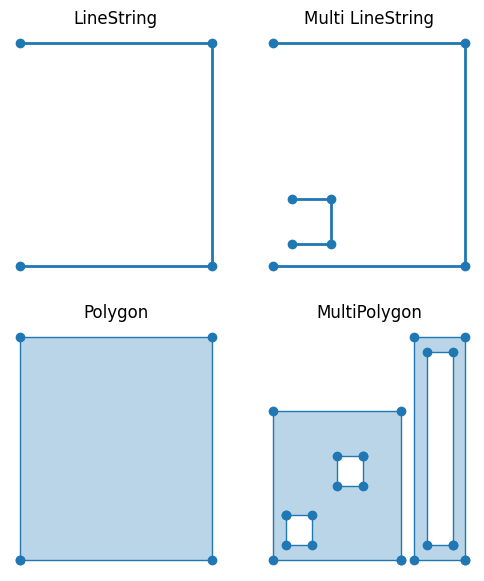

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(6, 7))
titles = [['LineString', 'Multi LineString'], ['Polygon', 'MultiPolygon']]
geoms = [[line, multi_line], [poly, multi_poly]]
funcs = [[plot_line, plot_line], [plot_polygon, plot_polygon]]
for i in range(2):
    for j in range(2):
        funcs[i][j](geoms[i][j], ax=ax[i, j])
        ax[i, j].set_title(titles[i][j])
        ax[i, j].set_axis_off()

## MultiPointの場合
---

In [6]:
geom_disassembly(multi_point, response='point')

[<POINT (0 0)>, <POINT (10 0)>, <POINT (10 10)>, <POINT (0 10)>]

In [7]:
geom_disassembly(multi_point, response='xyz')

((0.0, 0.0), (10.0, 0.0), (10.0, 10.0), (0.0, 10.0))

In [8]:
geom_disassembly(multi_point, response='x_y_z', data_class=False)

[[0.0, 10.0, 10.0, 0.0], [0.0, 0.0, 10.0, 10.0], [None, None, None, None]]

In [9]:
geom_disassembly(multi_point, response='x_y_z', data_class=True)

XYZ(x=[0.0, 10.0, 10.0, 0.0], y=[0.0, 0.0, 10.0, 10.0], z=[None, None, None, None])

## LineStringの場合
---

In [10]:
geom_disassembly(line, response='point')

[<POINT (0 0)>, <POINT (10 0)>, <POINT (10 10)>, <POINT (0 10)>]

In [11]:
geom_disassembly(line, response='xyz')

[(0.0, 0.0), (10.0, 0.0), (10.0, 10.0), (0.0, 10.0)]

In [12]:
geom_disassembly(line, response='x_y_z', data_class=False)

[[0.0, 10.0, 10.0, 0.0], [0.0, 0.0, 10.0, 10.0], [None, None, None, None]]

In [13]:
geom_disassembly(line, response='x_y_z', data_class=True)

XYZ(x=[0.0, 10.0, 10.0, 0.0], y=[0.0, 0.0, 10.0, 10.0], z=[None, None, None, None])

## MultiLineStringの場合
---

In [14]:
resps = geom_disassembly(multi_line, response='point')
rich.print(resps)

[
    [<POINT (0 0)>, <POINT (10 0)>, <POINT (10 10)>, <POINT (0 10)>],
    [<POINT (1 1)>, <POINT (3 1)>, <POINT (3 3)>, <POINT (1 3)>]
]

In [15]:
resps = geom_disassembly(multi_line, response='xyz')
rich.print(resps)

[[(0.0, 0.0), (10.0, 0.0), (10.0, 10.0), (0.0, 10.0)], [(1.0, 1.0), (3.0, 1.0), (3.0, 3.0), (1.0, 3.0)]]

In [16]:
resps = geom_disassembly(multi_line, response='x_y_z', data_class=False)
rich.print(resps)

[
    [[0.0, 10.0, 10.0, 0.0], [0.0, 0.0, 10.0, 10.0], [None, None, None, None]],
    [[1.0, 3.0, 3.0, 1.0], [1.0, 1.0, 3.0, 3.0], [None, None, None, None]]
]

In [17]:
resps = geom_disassembly(multi_line, response='x_y_z', data_class=True)
rich.print(resps)

[
    XYZ(x=[0.0, 10.0, 10.0, 0.0], y=[0.0, 0.0, 10.0, 10.0], z=[None, None, None, None]),
    XYZ(x=[1.0, 3.0, 3.0, 1.0], y=[1.0, 1.0, 3.0, 3.0], z=[None, None, None, None])
]

## Polygonの場合
---

In [18]:
geom_disassembly(poly, response='point')

[<POINT (0 0)>, <POINT (10 0)>, <POINT (10 10)>, <POINT (0 10)>, <POINT (0 0)>]

In [19]:
geom_disassembly(poly, response='xyz')

[(0.0, 0.0), (10.0, 0.0), (10.0, 10.0), (0.0, 10.0), (0.0, 0.0)]

In [22]:
geom_disassembly(poly, response='x_y_z', data_class=False)

[[0.0, 10.0, 10.0, 0.0, 0.0],
 [0.0, 0.0, 10.0, 10.0, 0.0],
 [None, None, None, None, None]]

In [21]:
geom_disassembly(poly, response='x_y_z', data_class=True)

XYZ(x=[0.0, 10.0, 10.0, 0.0, 0.0], y=[0.0, 0.0, 10.0, 10.0, 0.0], z=[None, None, None, None, None])

### MultiPolygonの場合
---

MultiPolygonの場合はOuterのPolygonやInnerのPolygonなどがあるので、`data_class`をTrueにする方が理解しやすいデータになります。

In [27]:
resps = geom_disassembly(multi_poly, response='point', data_class=False)
rich.print(resps)

[
    [
        [<POINT (10 0)>, <POINT (0 0)>, <POINT (0 10)>, <POINT (10 10)>, <POINT (10 0)>],
        [
            [<POINT (1 3)>, <POINT (1 1)>, <POINT (3 1)>, <POINT (3 3)>, <POINT (1 3)>],
            [<POINT (7 7)>, <POINT (5 7)>, <POINT (5 5)>, <POINT (7 5)>, <POINT (7 7)>]
        ]
    ],
    [
        [<POINT (15 0)>, <POINT (11 0)>, <POINT (11 15)>, <POINT (15 15)>, <POINT (15 0)>],
        [[<POINT (14 1)>, <POINT (14 14)>, <POINT (12 14)>, <POINT (12 1)>, <POINT (14 1)>]]
    ]
]

In [20]:
resps = geom_disassembly(multi_poly, response='point', data_class=True)
rich.print(resps)

[
    PolyParts(
        outer=[<POINT (10 0)>, <POINT (0 0)>, <POINT (0 10)>, <POINT (10 10)>, <POINT (10 0)>],
        inners=[
            [<POINT (1 3)>, <POINT (1 1)>, <POINT (3 1)>, <POINT (3 3)>, <POINT (1 3)>],
            [<POINT (7 7)>, <POINT (5 7)>, <POINT (5 5)>, <POINT (7 5)>, <POINT (7 7)>]
        ]
    ),
    PolyParts(
        outer=[<POINT (15 0)>, <POINT (11 0)>, <POINT (11 15)>, <POINT (15 15)>, <POINT (15 0)>],
        inners=[[<POINT (14 1)>, <POINT (14 14)>, <POINT (12 14)>, <POINT (12 1)>, <POINT (14 1)>]]
    )
]

In [21]:
resps = geom_disassembly(multi_poly, response='xyz')
rich.print(resps)

[
    PolyParts(
        outer=[(10.0, 0.0), (0.0, 0.0), (0.0, 10.0), (10.0, 10.0), (10.0, 0.0)],
        inners=[
            [(1.0, 3.0), (1.0, 1.0), (3.0, 1.0), (3.0, 3.0), (1.0, 3.0)],
            [(7.0, 7.0), (5.0, 7.0), (5.0, 5.0), (7.0, 5.0), (7.0, 7.0)]
        ]
    ),
    PolyParts(
        outer=[(15.0, 0.0), (11.0, 0.0), (11.0, 15.0), (15.0, 15.0), (15.0, 0.0)],
        inners=[[(14.0, 1.0), (14.0, 14.0), (12.0, 14.0), (12.0, 1.0), (14.0, 1.0)]]
    )
]

In [23]:
resps = geom_disassembly(multi_poly, response='x_y_z', data_class=False)
rich.print(resps)

[
    [
        [[10.0, 0.0, 0.0, 10.0, 10.0], [0.0, 0.0, 10.0, 10.0, 0.0], [None, None, None, None, None]],
        [
            [[1.0, 1.0, 3.0, 3.0, 1.0], [3.0, 1.0, 1.0, 3.0, 3.0], [None, None, None, None, None]],
            [[7.0, 5.0, 5.0, 7.0, 7.0], [7.0, 7.0, 5.0, 5.0, 7.0], [None, None, None, None, None]]
        ]
    ],
    [
        [[15.0, 11.0, 11.0, 15.0, 15.0], [0.0, 0.0, 15.0, 15.0, 0.0], [None, None, None, None, None]],
        [[[14.0, 14.0, 12.0, 12.0, 14.0], [1.0, 14.0, 14.0, 1.0, 1.0], [None, None, None, None, None]]]
    ]
]

In [24]:
resps = geom_disassembly(multi_poly, response='x_y_z', data_class=True)
rich.print(resps)

[
    PolyParts(
        outer=XYZ(
            x=[10.0, 0.0, 0.0, 10.0, 10.0],
            y=[0.0, 0.0, 10.0, 10.0, 0.0],
            z=[None, None, None, None, None]
        ),
        inners=[
            XYZ(x=[1.0, 1.0, 3.0, 3.0, 1.0], y=[3.0, 1.0, 1.0, 3.0, 3.0], z=[None, None, None, None, None]),
            XYZ(x=[7.0, 5.0, 5.0, 7.0, 7.0], y=[7.0, 7.0, 5.0, 5.0, 7.0], z=[None, None, None, None, None])
        ]
    ),
    PolyParts(
        outer=XYZ(
            x=[15.0, 11.0, 11.0, 15.0, 15.0],
            y=[0.0, 0.0, 15.0, 15.0, 0.0],
            z=[None, None, None, None, None]
        ),
        inners=[
            XYZ(
                x=[14.0, 14.0, 12.0, 12.0, 14.0],
                y=[1.0, 14.0, 14.0, 1.0, 1.0],
                z=[None, None, None, None, None]
            )
        ]
    )
]